In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [6]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,sms,label
0,"['ذهاب', 'جورونج', 'نقط', 'مجنو', 'استفاد', 'ب...",0
1,"['طيب', 'نكت', 'لار']",0
2,"['دخول', 'مجا', '٢', 'كاس', 'اتحاد', 'نهاء', '...",1
3,"['اقول', 'وقت', 'مبكر', 'هور']",0
4,"['ناه', 'اعتقد', 'جو', 'اوسف', 'عيش', 'حول', '...",0


F:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

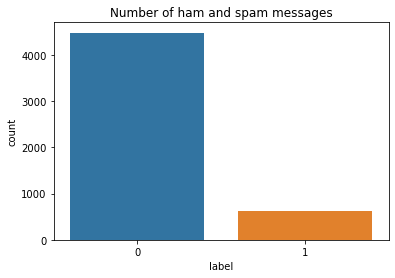

In [7]:
sns.countplot(df.label)
plt.xlabel('label')
plt.title('Number of ham and spam messages')

In [8]:
'''X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
'''

'X = df.v2\nY = df.v1\nle = LabelEncoder()\nY = le.fit_transform(Y)\nY = Y.reshape(-1,1)\n'

In [9]:
X = df['sms']
Y = df['label']

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

# Data processing 
* Tokenize the data
* Padding 

In [11]:

tags = df.label
texts = df.sms
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics
print('import done')

import done


In [12]:
num_max = 1000
# preprocess
le = LabelEncoder()
tags = le.fit_transform(tags)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)
mat_texts = tok.texts_to_matrix(texts,mode='count')
print(tags[:5])
print(mat_texts[:5])
print(tags.shape,mat_texts.shape)

[0 0 1 0 0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5113,) (5113, 1000)


In [13]:
def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',metrics.binary_accuracy])
    print('compile done')
    return model

def check_model(model,x,y):
    model.fit(x,y,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

m = get_simple_model()
check_model(m,mat_texts,tags)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 644,097
Trainable params: 644,097
Non-trainable params: 0
_________________________________________________________________
compile done
Train on 4090 samples, validate on 10

F:\Conda\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


4090/4090 [==============================] - 1s 155us/sample - loss: 0.0867 - acc: 0.9746 - binary_accuracy: 0.9746 - val_loss: 0.1070 - val_acc: 0.9677 - val_binary_accuracy: 0.9677
Epoch 3/10
4090/4090 [==============================] - 1s 141us/sample - loss: 0.0449 - acc: 0.9861 - binary_accuracy: 0.9861 - val_loss: 0.1197 - val_acc: 0.9707 - val_binary_accuracy: 0.9707
Epoch 4/10
4090/4090 [==============================] - 1s 139us/sample - loss: 0.0306 - acc: 0.9897 - binary_accuracy: 0.9897 - val_loss: 0.1515 - val_acc: 0.9619 - val_binary_accuracy: 0.9619
Epoch 5/10
4090/4090 [==============================] - 1s 144us/sample - loss: 0.0248 - acc: 0.9934 - binary_accuracy: 0.9934 - val_loss: 0.1944 - val_acc: 0.9599 - val_binary_accuracy: 0.9599
Epoch 6/10
4090/4090 [==============================] - 1s 125us/sample - loss: 0.0227 - acc: 0.9939 - binary_accuracy: 0.9939 - val_loss: 0.1738 - val_acc: 0.9648 - val_binary_accuracy: 0.9648
Epoch 7/10
4090/4090 [===================

# **CNN**

In [14]:
# for cnn preproces
from keras.utils import pad_sequences

max_len = 100
cnn_texts_seq = tok.texts_to_sequences(texts)
print(cnn_texts_seq[0])
cnn_texts_mat = pad_sequences(cnn_texts_seq,maxlen=max_len)
print(cnn_texts_mat[0])
print(cnn_texts_mat.shape)

[42, 239, 813, 734, 274, 100, 960, 11, 142]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  42 239 813 734 274 100 960  11 142]
(5113, 100)


**Model v1**

In [ ]:
def get_cnn_model_v1():   
    model = Sequential()
    # we start off with an efficient embedding layer which maps
    # our vocab indices into embedding_dims dimensions
    # 1000 is num_max
    model.add(Embedding(1000,
                        20,
                        input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
    return model

m = get_cnn_model_v1()
check_model(m,cnn_texts_mat,tags)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 20)           20000     
                                                                 
 dropout_2 (Dropout)         (None, 100, 20)           0         
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            3904      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 256)               16640     
                                                                 
 d

**Model v2**

In [ ]:
def get_cnn_model_v2(): # added embed   
    model = Sequential()
    # we start off with an efficient embedding layer which maps
    # our vocab indices into embedding_dims dimensions
    # 1000 is num_max
    model.add(Embedding(1000,
                        50, #!!!!!!!!!!!!!!!!!!!!!!!
                        input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
    return model

m = get_cnn_model_v2()
check_model(m,cnn_texts_mat,tags)

**Model v3**

In [ ]:
def get_cnn_model_v3():    # added filter
    model = Sequential()
    # we start off with an efficient embedding layer which maps
    # our vocab indices into embedding_dims dimensions
    # 1000 is num_max
    model.add(Embedding(1000,
                        20,
                        input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(256, #!!!!!!!!!!!!!!!!!!!
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
    return model

m = get_cnn_model_v3()
check_model(m,cnn_texts_mat,tags)

**Test data processing**

In [ ]:
 test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

**Test data evaluation**

In [ ]:
accr = m.evaluate(test_sequences_matrix,Y_test)

# **Print the final result**

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))